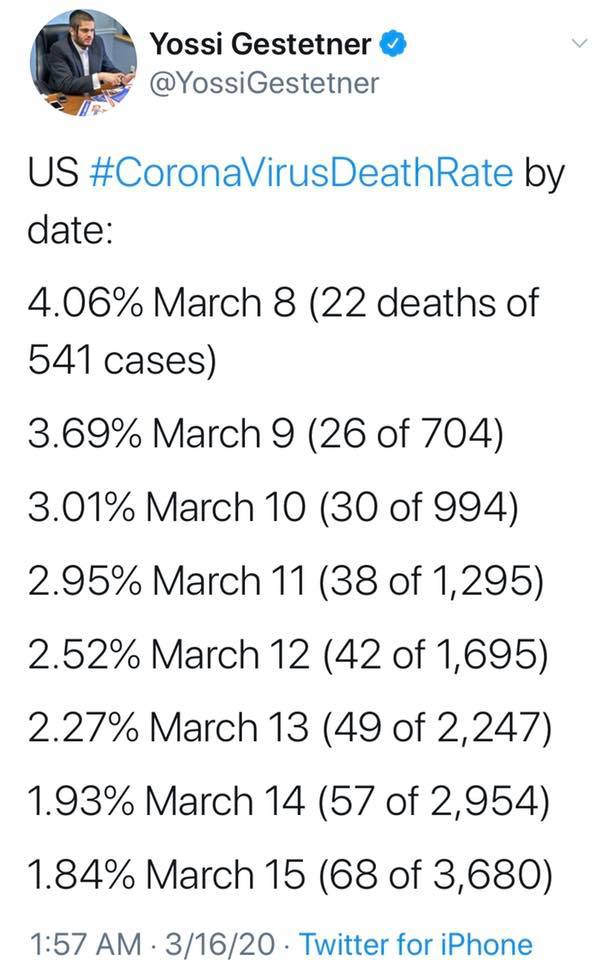

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

log: 98.73%


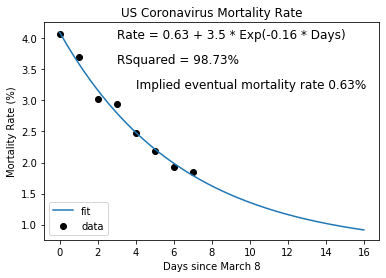

In [83]:
deathrate = np.array([
    22/541, 26/704, 30/994,
    38/1295, 42/1695, 49/2247,
    57/2954, 68/3680]) * 100
days = np.arange(len(deathrate))
linspace = np.linspace(0, 2 * len(deathrate), 200)

plt.scatter(days, deathrate, color='black', label="data")

def myFunction(x, intercept, scale, rate):
    return intercept + scale * np.exp(x * rate)
# initial params from low guess at rate (0.25%)
# and params from running a fit on log(deathrate) vs days
popt, pcov = curve_fit(myFunction, days, deathrate, p0=[0.25, 3.75, -0.12])
plt.plot(linspace, myFunction(linspace, *popt), label="fit")
myR2 = np.sum((myFunction(days, *popt) - np.mean(deathrate)) ** 2) / np.sum((deathrate - np.mean(deathrate)) ** 2)
print("log: %.2f%%" % (myR2 * 100))

plt.text(3, 4, "Rate = %.2f + %.1f * Exp(%.2f * Days)" % (popt[0], popt[1], popt[2]), fontsize=12)
plt.text(3, 3.6, "RSquared = %.2f%%" % (myR2 * 100), fontsize=12)
plt.text(4, 3.2, "Implied eventual mortality rate %.2f%%" % (popt[0]), fontsize=12)
plt.title("US Coronavirus Mortality Rate")
plt.xlabel("Days since March 8")
plt.ylabel("Mortality Rate (%)")
plt.legend(loc='lower left')
plt.show()

In [82]:
myFunction(7 + 30, *popt)

0.44857259275850725

In [84]:
deathrate

array([4.06654344, 3.69318182, 3.01810865, 2.93436293, 2.47787611,
       2.18068536, 1.929587  , 1.84782609])